In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow import keras
# from sklearn.model_selection import train_test_split
import seaborn as sns

### 경사하강법 복습

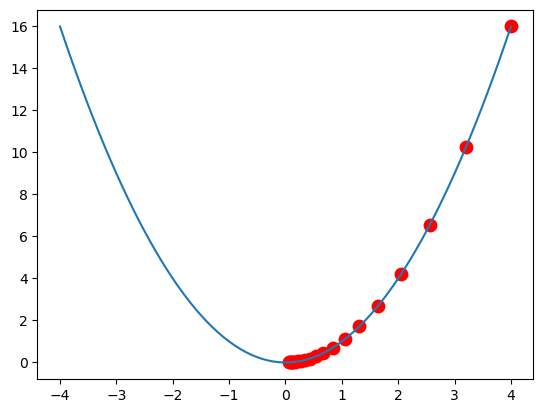

In [11]:
x_ = np.arange(-4, 4.1, 0.1)
y_ = x_ **2

x = 4
y = 16
lr = 0.1

plt.plot(x_,y_)

for _ in range(20):
    plt.scatter(x,y,s=80,c='red')
    dy_dx = 2*x
    x = x - lr * dy_dx
    y = x ** 2
    
plt.show()

### 선형 회귀 복습

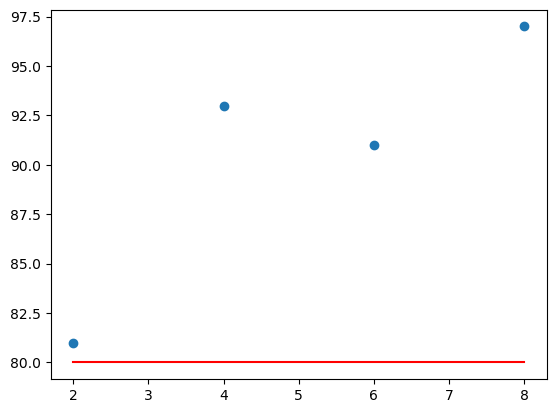

In [17]:
## regression gd solution
data = [[2,81],[4,93],[6,91],[8,97]]

x_data = np.array([i[0] for i in data])
y_data = np.array([i[1] for i in data])

a = 0
b = 80

plt.scatter(x_data, y_data)
plt.plot(x_data, a * x_data + b, c='red')
plt.show()

iter = 0, slope = 18.56, intercept = 3.62
iter = 100, slope = 8.941589161698868, intercept = 39.365836291181544
iter = 200, slope = 5.76490640919045, intercept = 58.32292038635208
iter = 300, slope = 4.107636114212476, intercept = 68.21280074205256
iter = 400, slope = 3.2430408604221497, intercept = 73.37233545525181
iter = 500, slope = 2.791982903767777, intercept = 76.06405643662485


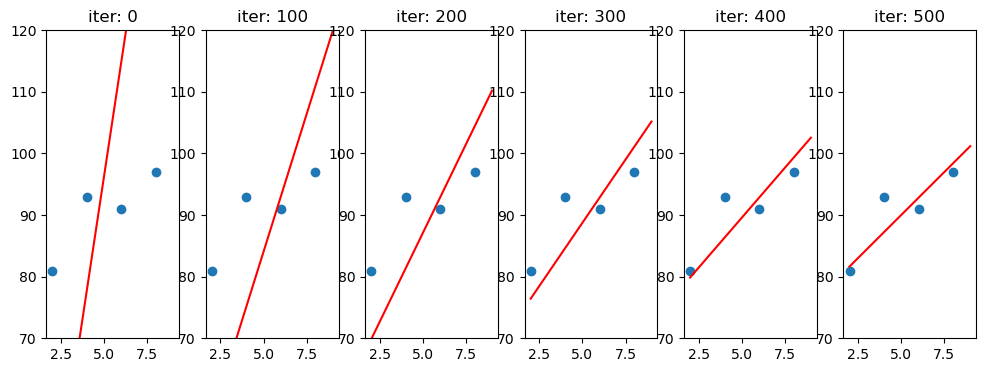

In [37]:
a = 0
b = 0
lr = 0.02
iter = 501

fig, ax = plt.subplots(1,6,figsize=(12,4))

x_fit = np.arange(2,10)
j = 0

for i in range(iter):
    y_hat = a * x_data + b
    error = y_data - y_hat

    a_diff = -(2/len(x_data)) * sum(x_data*(error))
    b_diff = -(2/len(x_data)) * sum((error))

    a = a - lr * a_diff
    b = b - lr * b_diff

    if i % 100 == 0:
        print(f'iter = {i}, slope = {a}, intercept = {b}')
        ax[j].scatter(x_data, y_data)
        ax[j].plot(x_fit, a * x_fit + b , c='red')
        ax[j].set_ylim(70, 120)
        ax[j].set_title(f'iter: {i}')
        j+=1
plt.show()

### 텐서플로 복습

In [43]:
model = keras.Sequential()
model.add(keras.layers.Dense(1, input_shape = (1, ), activation = 'linear'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [44]:
model.compile(loss='mse', optimizer='sgd')
model.fit(x_data, y_data, epochs=100)


Epoch 1/100
1/1 [==============================] - 0s 283ms/step - loss: 8334.2031
Epoch 2/100
1/1 [==============================] - 0s 7ms/step - loss: 2055.9727
Epoch 3/100
1/1 [==============================] - 0s 5ms/step - loss: 1128.5171
Epoch 4/100
1/1 [==============================] - 0s 5ms/step - loss: 986.9911
Epoch 5/100
1/1 [==============================] - 0s 4ms/step - loss: 960.9327
Epoch 6/100
1/1 [==============================] - 0s 5ms/step - loss: 951.8678
Epoch 7/100
1/1 [==============================] - 0s 8ms/step - loss: 945.3328
Epoch 8/100
1/1 [==============================] - 0s 5ms/step - loss: 939.2029
Epoch 9/100
1/1 [==============================] - 0s 5ms/step - loss: 933.1661
Epoch 10/100
1/1 [==============================] - 0s 5ms/step - loss: 927.1763
Epoch 11/100
1/1 [==============================] - 0s 4ms/step - loss: 921.2263
Epoch 12/100
1/1 [==============================] - 0s 4ms/step - loss: 915.3151
Epoch 13/100
1/1 [==============

In [45]:
model.weights

[<tf.Variable 'dense_3/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[11.557834]], dtype=float32)>,
 <tf.Variable 'dense_3/bias:0' shape=(1,) dtype=float32, numpy=array([23.75321], dtype=float32)>]

### XOR 문제 해결

In [60]:
import numpy as np

w11 = np.array([-2, -2])
w12 = np.array([2, 2])
w2 = np.array([1, 1])

b1 = 3
b2 = -1
b3 = -1

# 퍼셉트론 함수
def MLP(x, w, b):
    y = np.sum(w * x) + b
    if y <=0:
        print('MLP: 0')
        return 0
    else:
        print('MLP: 1')
        return 1

def NAND(x1, x2):
    print('NAND')
    return MLP(np.array([x1,x2]), w11, b1)

def OR(x1, x2):
    print('OR')
    return MLP(np.array([x1, x2]), w12, b2)

def AND(x1, x2):
    print('AND')
    return MLP(np.array([x1, x2]), w2, b3)

def XOR(x1, x2):
    print('XOR')
    return AND(NAND(x1, x2), OR(x1, x2))

for x in [(0,0), (1,0), (0,1), (1,1)]:
# for x in [(0,0)]:
    y = XOR(x[0], x[1])
    print(f'input:{x}, output:{y}')

XOR
NAND
MLP: 1
OR
MLP: 0
AND
MLP: 0
input:(0, 0), output:0
XOR
NAND
MLP: 1
OR
MLP: 1
AND
MLP: 1
input:(1, 0), output:1
XOR
NAND
MLP: 1
OR
MLP: 1
AND
MLP: 1
input:(0, 1), output:1
XOR
NAND
MLP: 0
OR
MLP: 1
AND
MLP: 0
input:(1, 1), output:0
